## Data Collection 

In [8]:
%load_ext watermark

In [11]:
%watermark -a "Datta Tele" -d -v -m -g -p numpy,scipy,matplotlib,sympy

Datta Tele 2017-09-24 

CPython 3.6.1
IPython 5.3.0

numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.2
sympy 1.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
Git hash   :


### Dowloading the Dataset

Top inspiring christian music and non-christian music is collected through web scrapping and downloaded as csv file. [Only artist name and title]

In [2]:
import pandas as pd

In [22]:
df = pd.read_csv("christian_Songs.csv")
df.head()

,title,artist
0,Even If,MercyMe
1,Broken Things,Matthew West
2,Old Church Choir,Zach Williams
3,O Come to the Altar,Elevation Worship
4,Different,Micah Tyler


### Dowloading Lyrics as per artist and title of song

Below  we will download the lyrics from __[LyricWikia](http://lyrics.wikia.com/wiki/Lyrics_Wiki)__ for my favorite song "Steady" by "For King and Country".

In [18]:
import urllib
import lxml.html

class Song(object):
    def __init__(self, artist, title):
        self.artist = self.__format_str(artist)
        self.title = self.__format_str(title)
        self.url = None
        self.lyric = None
        
    def __format_str(self, s):
        # remove paranthesis and contents
        s = s.strip()
        try:
            # strip accent
            s = ''.join(c for c in unicodedata.normalize('NFD', s)
                         if unicodedata.category(c) != 'Mn')
        except:
            pass
        s = s.title()
        return s
        
    def __quote(self, s):
         return urllib.parse.quote(s.replace(' ', '_'))

    def __make_url(self):
        artist = self.__quote(self.artist)
        title = self.__quote(self.title)
        artist_title = '%s:%s' %(artist, title)
        url = 'http://lyrics.wikia.com/' + artist_title
        self.url = url
        
    def update(self, artist=None, title=None):
        if artist:
            self.artist = self.__format_str(artist)
        if title:
            self.title = self.__format_str(title)
        
    def lyricwikia(self):
        self.__make_url()
        try:
            doc = lxml.html.parse(self.url)
            lyricbox = doc.getroot().cssselect('.lyricbox')[0]
        except (IOError, IndexError) as e:
            self.lyric = ''
            return self.lyric
        lyrics = []

        for node in lyricbox:
            if node.tag == 'br':
                lyrics.append('\n')
            if node.tail is not None:
                lyrics.append(node.tail)
        self.lyric =  "".join(lyrics).strip()    
        return self.lyric
    
song = Song(artist='For King & Country', title='Steady')
lyr = song.lyricwikia()
print(lyr)

My constant solid ground
You are my lantern in the night

When I'm twisted up and shaken
You're the one I put my faith in
Yeah, you're the reason I survive

You keep me steady when the sky is falling
And I'll keep steady after You
I'll carry on when my strength is failing
Take heart 'cause You're with me
So let the sun stop, stars drop, whatever comes
I'll be ready, You keep me steady
You keep me steady

You're a river, You cover me
When the bombs fall, You're the cavalry
Somehow You're always standing right by my side

So no matter what I will be facing
I will not be over-taken
And You are the only reason why

You're my hiding place, my home
And fear cannot invade these four walls
I need You near, I need You here

You keep me steady
You keep me steady


### Downloading lyrics for top inspiring songs and added to dataframe

First, we add a new cloumn for the lyrics, iterate the process and download the lyrics based on titles of music and artist name. 

In [24]:
import pyprind

pbar = pyprind.ProgBar(df.shape[0])
for row_id in df.index:
    song = Song(artist=df.loc[row_id]['artist'], title=df.loc[row_id]['title'])
    lyr = song.lyricwikia()
    df.loc[row_id,'lyrics'] = lyr
    pbar.update()
    
df.tail()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:27


,title,artist,lyrics
98,Breathe,Jonny Diaz,"It's off to the races, everybody out the door\..."
99,Steady,For KING & COUNTRY,My constant solid ground\nYou are my lantern i...
100,Shoulders,For KING & COUNTRY,And despair holds me for ransom\nI will feel n...
101,Run Wild,For KING & COUNTRY,
102,This is Love,For KING & COUNTRY,When I first met you\nThe moment moved me\nI s...


In [17]:
df.head()

,title,artist,lyrics
0,Even If,MercyMe,"Sometimes you lose some\nAnd right now, right ..."
1,Broken Things,Matthew West,I stopped at the gate\nThinking I don't deserv...
2,Old Church Choir,Zach Williams,"Like a wildfire in my heart\nSunday morning, H..."
3,O Come to the Altar,Elevation Worship,Overwhelmed by the weight of your sin\nJesus i...
4,Different,Micah Tyler,"I don't wanna see anymore, give me a vision\nT..."


### Remove empty rows where lyrics is not downloaded and keep the backup 

In [25]:
df.to_csv('lyrics_backup.csv')

In [27]:
df =  df[df.lyrics!='']

In [32]:
df.describe()

,title,artist,lyrics
count,67,67,67
unique,66,35,63
top,Oceans (Where Feet May Fail),Lauren Daigle,Overwhelmed by the weight of your sin\nJesus i...
freq,2,5,2


In [75]:
df.to_csv("topsongs.csv")

## WordCloud

Word Cloud is technique to visualize the text data. It is a weighted list of words, typically specific words appears in a source of textual data. 
Package source - __[https://github.com/amueller/word_cloud](https://github.com/amueller/word_cloud)__

In [56]:
wor = str(df['lyrics'])

In [59]:
worde = wor

## Word cloud of top inspiring christian songs

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

In [62]:
words = ' '.join(df['lyrics'])

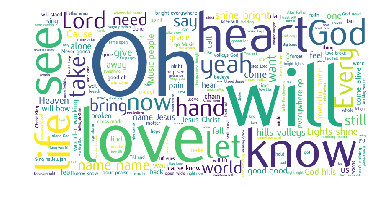

In [68]:
wordcloud = WordCloud( 
                      font_path="C://Users//datta//Fonts//Flux Regular.otf",
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=400
            ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./wordcloud_all_w.png', dpi=800)
plt.show()

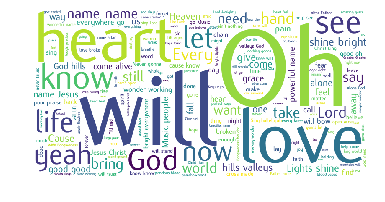

In [74]:
lyr = ' '.join(df.loc[:, 'lyrics'])

wordcloud = WordCloud( 
                      font_path="C://Users//datta//Fonts//Flux Regular.otf",
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=400
            ).generate(lyr)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./lyrworld.png', dpi=300)
plt.show()

In [76]:
sp_df = pd.read_csv("spotify_inspirational.csv")
sp_df.head()

,title,artist
0,I Won't Give Up,Jason Mraz
1,Castle on the Hill,Ed Sheeran
2,That's What I Like,Bruno Mars
3,Boulevard Of Broken Dreams - feat. John Gallag...,Green Day
4,Fast Car - 2015 Remastered,Tracy Chapman


In [77]:
import pyprind

pbar = pyprind.ProgBar(sp_df.shape[0])
for row_id in sp_df.index:
    song = Song(artist=sp_df.loc[row_id]['artist'], title=sp_df.loc[row_id]['title'])
    lyr = song.lyricwikia()
    sp_df.loc[row_id,'lyrics'] = lyr
    pbar.update()
    
sp_df.tail()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:26


,title,artist,lyrics
25,Uprising,Muse,The P.R. transmissions will resume\nThey'll tr...
26,One Call Away,Charlie Puth,I'll be there to save the day\nSuperman got no...
27,Edge of Seventeen,Stevie Nicks,"Sounds like she's singing\nOoh, ooh, ooh\nJust..."
28,Semi-Charmed Life,Third Eye Blind,"I'm smiling, she's living\nShe's golden, she l..."
29,Adventure Of A Lifetime,Coldplay,Umi she'd say\nEverything you want's a dream a...


In [78]:
sp_df.head()

,title,artist,lyrics
0,I Won't Give Up,Jason Mraz,It's like watching the night sky\nOr a beautif...
1,Castle on the Hill,Ed Sheeran,I was running from my brother and his friends\...
2,That's What I Like,Bruno Mars,"Baby girl, what's hatnin'?\nYou and your ass i..."
3,Boulevard Of Broken Dreams - feat. John Gallag...,Green Day,
4,Fast Car - 2015 Remastered,Tracy Chapman,


In [79]:
sp_df.to_csv("spotisongs.csv")

In [80]:
sp_df =  sp_df[sp_df.lyrics!='']

In [81]:
sp_df.to_csv("spotisongsinsp.csv")

In [82]:
sp_df.head()

,title,artist,lyrics
0,I Won't Give Up,Jason Mraz,It's like watching the night sky\nOr a beautif...
1,Castle on the Hill,Ed Sheeran,I was running from my brother and his friends\...
2,That's What I Like,Bruno Mars,"Baby girl, what's hatnin'?\nYou and your ass i..."
5,How You Remind Me,Nickelback,I couldn't cut it as a poor man stealin'\nTire...
6,Iris,The Goo Goo Dolls,'Cause I know that you feel me somehow\nYou're...


### WordCloud for top inspiring non-christian songs

In [83]:
spotiwords =' '.join(sp_df['lyrics'])

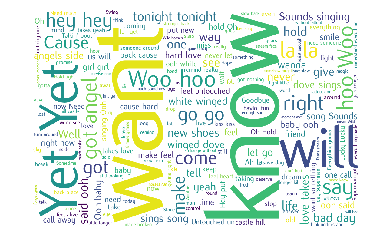

In [85]:
wordcloud = WordCloud( 
                      font_path="C://Users//datta//Fonts//Flux Regular.otf",
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1080,
                      height=720
            ).generate(spotiwords)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./spoticloud_all_w.png', dpi=300)
plt.show()

In [92]:
combine_df = pd.read_excel("topsongs.xlsx")

In [93]:
combine_df.head()

,title,artist,lyrics,Category
0,Even If,MercyMe,"Sometimes you lose some\r\nAnd right now, righ...",Inspiring
1,Broken Things,Matthew West,I stopped at the gate\r\nThinking I don't dese...,Inspiring
2,Old Church Choir,Zach Williams,"Like a wildfire in my heart\r\nSunday morning,...",Inspiring
3,O Come to the Altar,Elevation Worship,Overwhelmed by the weight of your sin\r\nJesus...,Inspiring
4,Different,Micah Tyler,"I don't wanna see anymore, give me a vision\r\...",Inspiring


In [97]:
combine_df.tail()

,title,artist,lyrics,Category
84,Uprising,Muse,The P.R. transmissions will resume\r\nThey'll ...,inspiring_non_christian_music
85,One Call Away,Charlie Puth,I'll be there to save the day\r\nSuperman got ...,inspiring_non_christian_music
86,Edge of Seventeen,Stevie Nicks,"Sounds like she's singing\r\nOoh, ooh, ooh\r\n...",inspiring_non_christian_music
87,Semi-Charmed Life,Third Eye Blind,"I'm smiling, she's living\r\nShe's golden, she...",inspiring_non_christian_music
88,Adventure Of A Lifetime,Coldplay,Umi she'd say\r\nEverything you want's a dream...,inspiring_non_christian_music


### WordCloud of all inspirational songs

In [94]:
combine_words =' '.join(combine_df['lyrics']) 

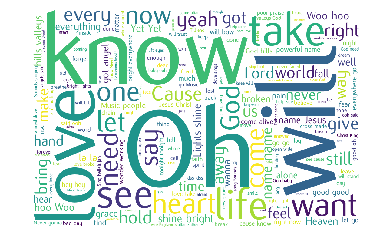

In [96]:
wordcloud = WordCloud( 
                      font_path="C://Users//datta//Fonts//Flux Regular.otf",
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1080,
                      height=720
            ).generate(combine_words)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./combinecloud_all_w.png', dpi=300)
plt.show()

In [101]:
blue = '#5A6FFA'
green = '#A3EB5B'

In [99]:
inspiring, inspiring_non_christian_music = sum(combine_df.loc[:, 'Category'] == 'inspiring'), sum(combine_df.loc[:, 'Category'] == 'inspiring_non_christian_music')

In [103]:
from matplotlib import rcParams
rcParams['font.size'] = 20

piechart = plt.pie(
    (inspiring, inspiring_non_christian_music),
    labels=('Inspiring christian music','Inspiring non christian music'),
    shadow=True,
    colors=(green, blue),
    explode=(0,0.15), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

plt.axis('equal')   
plt.tight_layout()
plt.savefig('./pie_inspire.eps', dpi=300)
plt.savefig('./pie_inspire.png', dpi=300)

In [106]:
non_df = pd.read_csv("non_inspirational_christian.csv")
non_df.head()

,title,artist
0,Take My Life - Stay Album Version,Jeremy Camp
1,Written On My Heart,Plus One
2,"Oh, Canada",Five Iron Frenzy
3,Sadie Hawkins Dance,Relient K
4,The Devil Is Bad,The W's


In [107]:
import pyprind

pbar = pyprind.ProgBar(non_df.shape[0])
for row_id in non_df.index:
    song = Song(artist=non_df.loc[row_id]['artist'], title=non_df.loc[row_id]['title'])
    lyr = song.lyricwikia()
    non_df.loc[row_id,'lyrics'] = lyr
    pbar.update()
    
non_df.tail()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:43


,title,artist,lyrics
25,The Red,Chevelle,When you're singled out\nThe red\nWell it filt...
26,God-Shaped Hole,Plumb,And every angle has its merit\nBut it all come...
27,Wait For Me,Rebecca St. James,Waiting for the look in your eyes\nWhen we mee...
28,R.I.O.T. - R.I.O.T. Album Version,Carman,
29,To Hell With The Devil,Stryper,He's no friend of mine\nTo turn from him is wh...


In [108]:
non_df.to_csv("noninspi.csv")

In [110]:
non_df =  non_df[non_df.lyrics!='']

In [111]:
non_df.to_csv("nonsongs.csv")

In [112]:
non_df.head()

,title,artist,lyrics
1,Written On My Heart,Plus One,If you had never walked into my life\nI would ...
2,"Oh, Canada",Five Iron Frenzy,"Canada, oh, Canada, it's great\nThe people are..."
3,Sadie Hawkins Dance,Relient K,Who they gonna take to the Sadie Hawkins?\nMy ...
5,Me and Jesus,Stellar Kart,All your bridges have been burned\nFeels like ...
6,Bring Em Out,Hawk Nelson,And people making noise \nJust let me hear you...


### WordCloud of uninspiring christian songs as per __[Link](https://open.spotify.com/user/deschlerk/playlist/3wLJuG575lvw3dxSdHw3Yr)__

In [118]:
non_words =' '.join(non_df['lyrics']) 

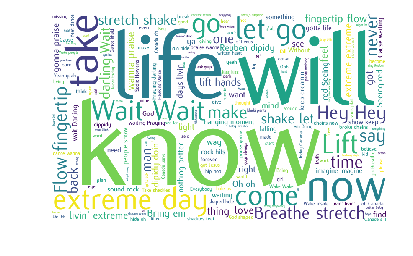

In [120]:
wordcloud = WordCloud( 
                      font_path="C://Users//datta//Fonts//Flux Regular.otf",
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=500
            ).generate(non_words)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./combinecloud_all_w.png', dpi=300)
plt.show()

In [3]:
music_df  = pd.read_excel("topsongs.xlsx")
music_df.head()

,title,artist,lyrics,Category
0,Even If,MercyMe,"Sometimes you lose some\r\nAnd right now, righ...",Inspiring
1,Broken Things,Matthew West,I stopped at the gate\r\nThinking I don't dese...,Inspiring
2,Old Church Choir,Zach Williams,"Like a wildfire in my heart\r\nSunday morning,...",Inspiring
3,O Come to the Altar,Elevation Worship,Overwhelmed by the weight of your sin\r\nJesus...,Inspiring
4,Different,Micah Tyler,"I don't wanna see anymore, give me a vision\r\...",Inspiring


In [4]:
music_df.describe()

,title,artist,lyrics,Category
count,113,113,113,113
unique,109,76,106,3
top,Kiss Me,MercyMe,"Nightly, beside the green, green grass\r\nSwin...",Inspiring
freq,3,5,3,67


### K Love

In [22]:
import pandas as pd
k_love_df = pd.read_csv('k_love_top_songs.csv')

In [13]:
k_love_df.head()

,artist_name,artist_url,artist_selection1,artist_selection1_url
0,Oh My Soul,http://www.klove.com/music/artists/casting-cro...,Casting Crowns,http://www.klove.com/music/artists/casting-cro...
1,Even If,http://www.klove.com/music/artists/mercyme/son...,MercyMe,http://www.klove.com/music/artists/mercyme/
2,Hard Love,http://www.klove.com/music/artists/needtobreat...,NEEDTOBREATHE,http://www.klove.com/music/artists/needtobreathe/
3,Broken Things,http://www.klove.com/music/artists/matthew-wes...,Matthew West,http://www.klove.com/music/artists/matthew-west/
4,Old Church Choir,http://www.klove.com/music/artists/zach-willia...,Zach Williams,http://www.klove.com/music/artists/zach-williams/


## After cleaning

In [16]:
k_love_df.head()

,title,artist
0,Oh My Soul,Casting Crowns
1,Even If,MercyMe
2,Hard Love,NEEDTOBREATHE
3,Broken Things,Matthew West
4,Old Church Choir,Zach Williams


### Download lyrics and add to the dataframe 

In [20]:
import pyprind

pbar = pyprind.ProgBar(k_love_df.shape[0])
for row_id in k_love_df.index:
    song = Song(artist=k_love_df.loc[row_id]['artist'], title=k_love_df.loc[row_id]['title'])
    lyr = song.lyricwikia()
    k_love_df.loc[row_id,'lyrics'] = lyr
    pbar.update()
    
k_love_df

0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


,title,artist,lyrics
0,Oh My Soul,Casting Crowns,"Oh, how you worry\nOh, how you're weary, from ..."
1,Even If,MercyMe,"Sometimes you lose some\nAnd right now, right ..."
2,Hard Love,NEEDTOBREATHE,Going to blows with your fear incarnate\nNever...
3,Broken Things,Matthew West,I stopped at the gate\nThinking I don't deserv...
4,Old Church Choir,Zach Williams,"Like a wildfire in my heart\nSunday morning, H..."
5,O Come To The Altar,Elevation Worship,Overwhelmed by the weight of your sin\nJesus i...
6,The Comeback,Danny Gokey,
7,Different,Micah Tyler,"I don't wanna see anymore, give me a vision\nT..."
8,Spirit Of The Living God,Meredith Andrews,
9,O God Forgive Us,for KING & COUNTRY,


we will add remaining lyrics to dataframe. First we need to save as backup 

In [25]:
k_love = pd.read_excel('k_love_songs.xlsx')

In [26]:
k_love

,title,artist,lyrics
0,Oh My Soul,Casting Crowns,"Oh, how you worry\r\nOh, how you're weary, fro..."
1,Even If,MercyMe,"Sometimes you lose some\r\nAnd right now, righ..."
2,Hard Love,NEEDTOBREATHE,Going to blows with your fear incarnate\r\nNev...
3,Broken Things,Matthew West,I stopped at the gate\r\nThinking I don't dese...
4,Old Church Choir,Zach Williams,"Like a wildfire in my heart\r\nSunday morning,..."
5,O Come To The Altar,Elevation Worship,Overwhelmed by the weight of your sin\r\nJesus...
6,The Comeback,Danny Gokey,After a season of nightfalls and pushbacks\nAf...
7,Different,Micah Tyler,"I don't wanna see anymore, give me a vision\r\..."
8,Spirit Of The Living God,Meredith Andrews,Spirit of the living God\nSpirit of the living...
9,O God Forgive Us,for KING & COUNTRY,O God Forgive Us\nLISTEN\nSONGS\nARTISTS\nLYRI...


In [27]:
k_words =' '.join(k_love['lyrics']) 

### WordCloud of Top K_Love Inspiring songs 

In [54]:
mask = np.array(Image.open("C://Users//datta//Movie_lens//lko.jpg"))
image_colors = ImageColorGenerator(mask)

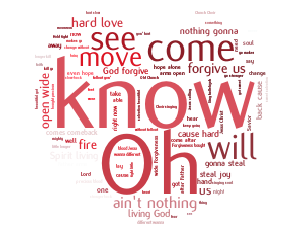

In [55]:
wordcloud = WordCloud( 
                      font_path="C://Users//datta//Fonts//Flux Regular.otf",
                      stopwords=STOPWORDS,
                      mask=mask,
                      background_color='white',
                      width=800,
                      height=500
            ).generate(k_words)

plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.savefig('./combinecloud_all_w.png', dpi=600)
plt.show()